<a href="https://colab.research.google.com/github/Mallika225-28/CODSOFT-Projects/blob/main/Task2_CODSOFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***TASK-2: MOVIE RATING PREDICTION WITH PYTHON***
* Author : Mallika Santra
* Batch :  MAY BATCH B28
* Domain : Data Science
* Aims : To analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/IMDb Movies India.csv',encoding ='latin1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(15509, 10)

In [ ]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
data.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
data.dropna(inplace=True) ##drop the missing value

In [ ]:
data.isna().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
data.shape

(5659, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [ ]:
data['Year'] = pd.to_numeric(data['Year'].str.extract('(\d+)',expand = False), errors='coerce') #convert the Year column from non numeric to numeric

In [ ]:
data['Year'].info()

<class 'pandas.core.series.Series'>
Index: 5659 entries, 1 to 15508
Series name: Year
Non-Null Count  Dtype
--------------  -----
5659 non-null   int64
dtypes: int64(1)
memory usage: 88.4 KB


In [ ]:
data['Year'].values

array([2019, 2019, 1997, ..., 1989, 1999, 1998])

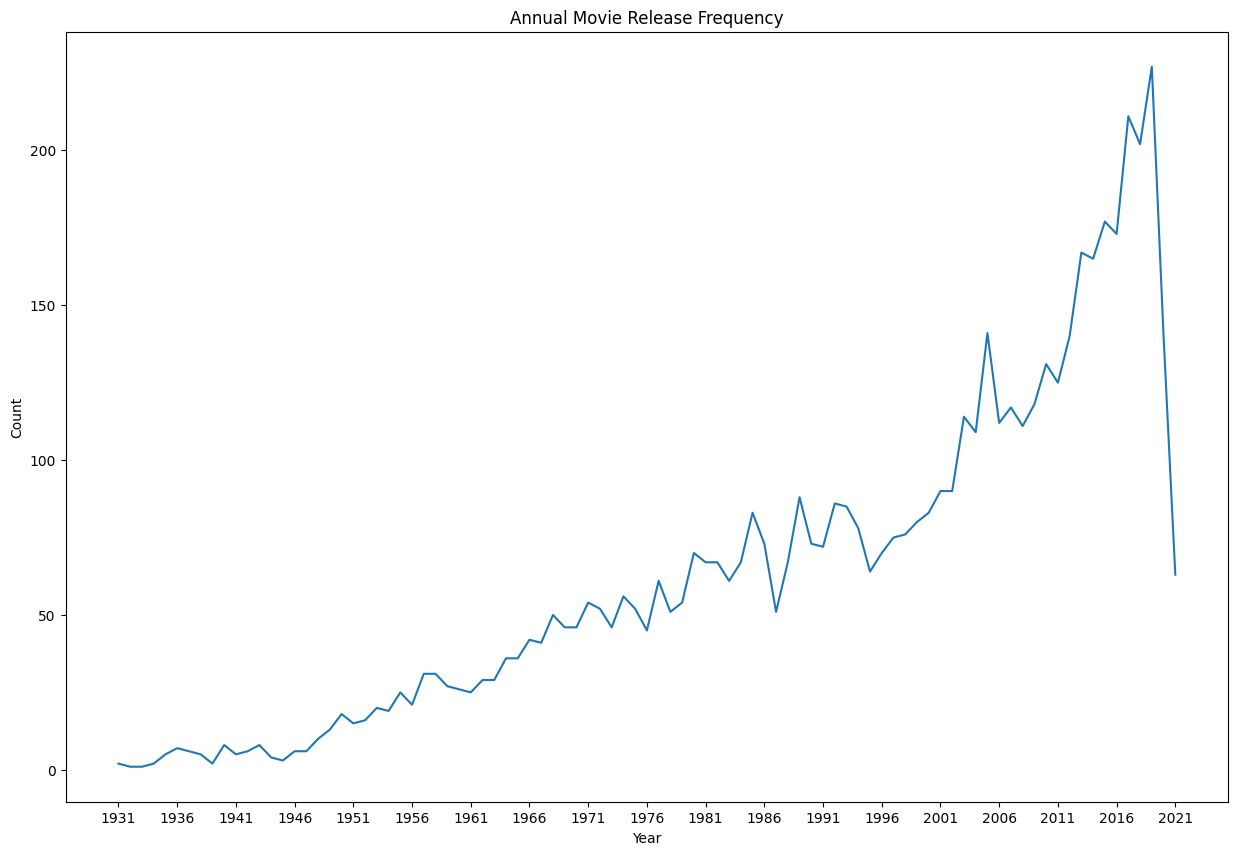

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(data = data['Year'].value_counts().sort_index())
tick_Positions = range(min(data['Year']),max(data['Year']) + 1 , 5)
plt.title('Annual Movie Release Frequency')
plt.xticks(tick_Positions)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


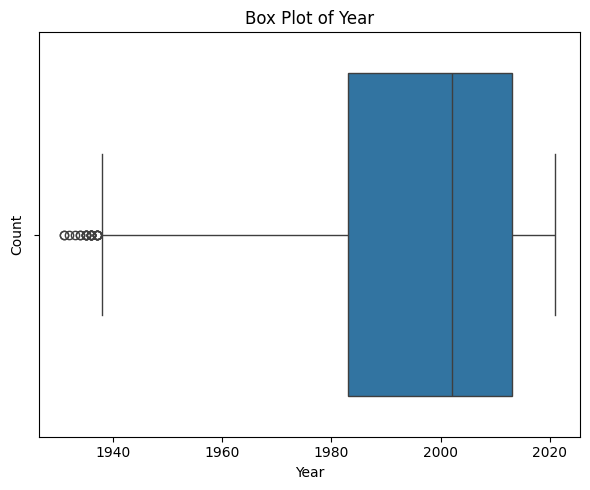

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x = 'Year', data = data)
plt.title('Box Plot of Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
data['Year'].median()

2002.0

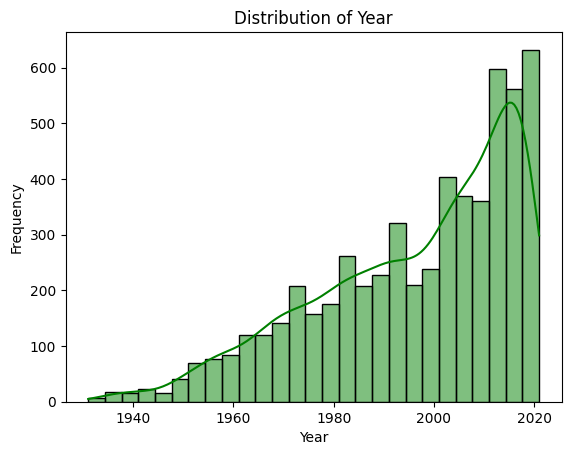

In [ ]:
sns.histplot(data['Year'], kde=True , color='green')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data['Duration'] = pd.to_numeric(data['Duration'].str.extract('(\d+)',expand = False), errors='coerce')

In [ ]:
data['Duration'].values

array([109, 110, 147, ..., 125, 129, 130])

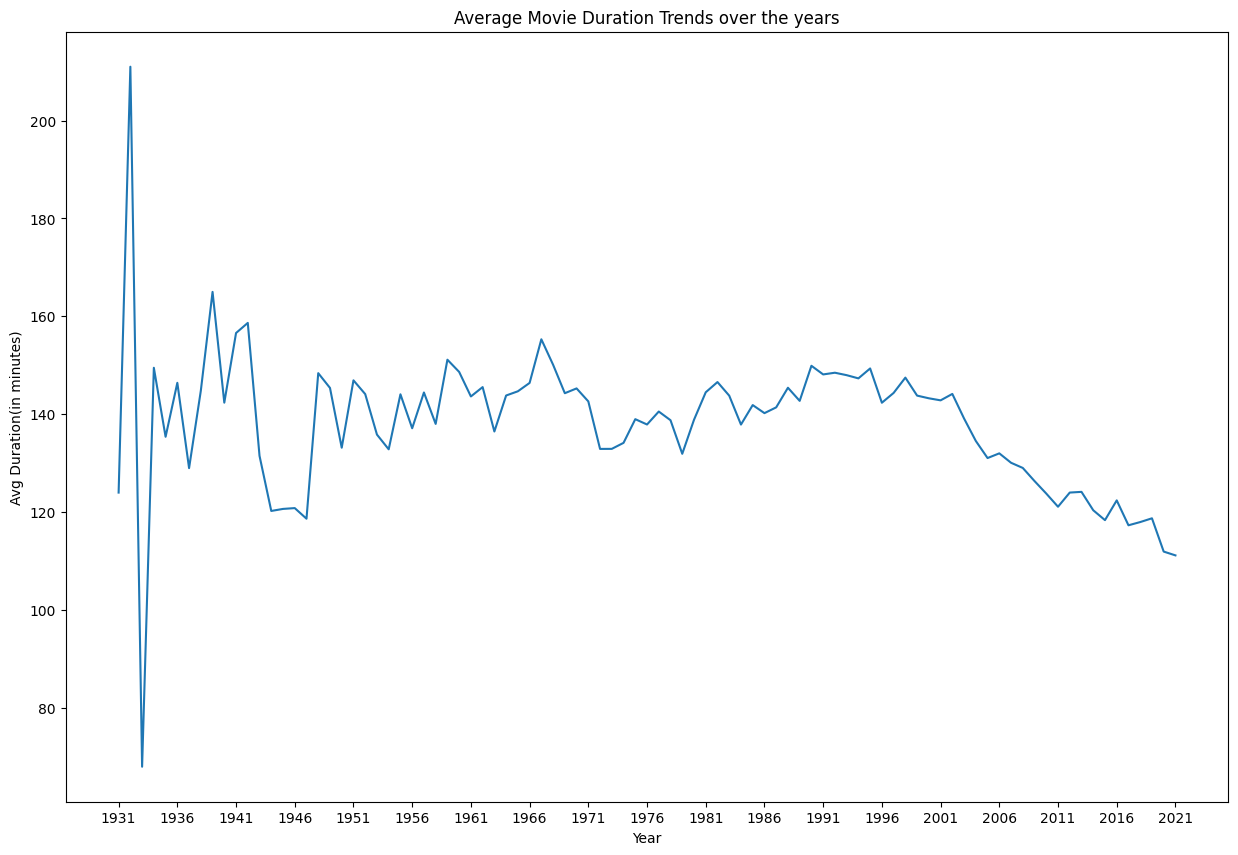

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(data = data.groupby('Year')['Duration'].mean().reset_index(),x='Year',y='Duration')
tick_Positions = range(min(data['Year']),max(data['Year']) + 1 , 5)
plt.title('Average Movie Duration Trends over the years')
plt.xticks(tick_Positions)
plt.xlabel('Year')
plt.ylabel('Avg Duration(in minutes)')
plt.show()

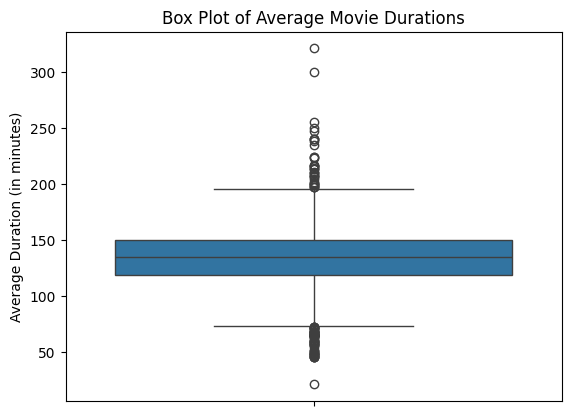

In [ ]:
sns.boxplot( y = 'Duration', data = data)
plt.title('Box Plot of Average Movie Durations')
plt.ylabel('Average Duration (in minutes)')
plt.show()

In [ ]:
Q1 = data['Rating'].quantile(0.25)
Q3 = data['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Rating'] >=lower_bound) & (data['Rating'] <= upper_bound)]
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


<Axes: xlabel='Duration', ylabel='Density'>

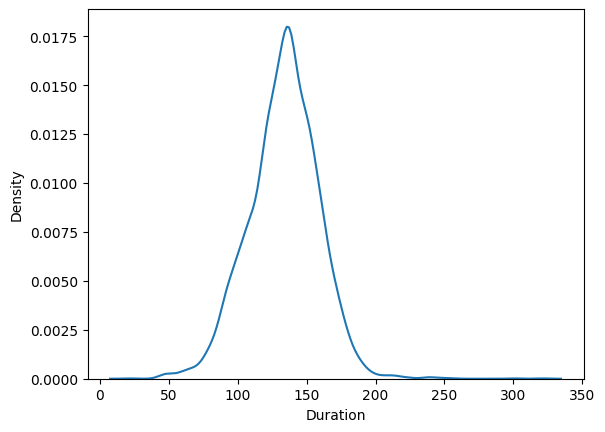

In [ ]:
sns.kdeplot(data['Duration'])

In [ ]:
genre = data['Genre']
genre

,Genre
1,Drama
3,"Comedy, Romance"
5,"Comedy, Drama, Musical"
6,"Drama, Romance, War"
8,"Horror, Mystery, Thriller"
...,...
15493,Drama
15494,"Biography, Drama, History"
15503,"Action, Crime, Drama"
15505,"Action, Drama"


In [ ]:
generes = data['Genre'].str.split(',',expand=True) #expand Genre column
generes

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
...,...,...,...
15493,Drama,None,None
15494,Biography,Drama,History
15503,Action,Crime,Drama
15505,Action,Drama,None


In [ ]:
stack_data = generes.stack()
stack_data.dropna()
value_count = stack_data.value_counts() # create a dataframe with frequency corresponding genre
print(value_count)

 Drama         1948
Drama          1835
Action         1641
 Romance       1214
Comedy          984
 Crime          602
 Thriller       584
 Family         363
 Comedy         351
 Musical        320
Crime           270
 Mystery        244
 Adventure      169
Romance         158
Horror          127
 Fantasy        114
Adventure       105
 History         91
Musical          89
Thriller         89
Biography        84
 Horror          74
Mystery          59
Family           52
 Music           50
Documentary      48
Animation        40
 Sport           38
 Action          34
 Biography       31
Fantasy          31
 War             30
 Sci-Fi          28
History           8
Sci-Fi            4
War               3
Music             3
Sport             2
 News             1
 Western          1
Name: count, dtype: int64


In [ ]:
data['Votes'] = data['Votes'].str.replace(',','').astype(int)

In [ ]:
data.Votes

,Votes
1,8
3,35
5,827
6,1086
8,326
...,...
15493,408
15494,1496
15503,44
15505,655


In [ ]:
directors = data['Director'].value_counts()
directors

,count
Director,
David Dhawan,41
Mahesh Bhatt,38
Hrishikesh Mukherjee,33
Shakti Samanta,33
Ram Gopal Varma,32
...,...
Milind Dhaimade,1
Ravi Sinha,1
Cherag Ruparel,1


In [ ]:
actors = pd.concat([data['Actor 1'],data['Actor 2'],data['Actor 3']]).dropna().value_counts()
actors

,count
Mithun Chakraborty,160
Amitabh Bachchan,147
Dharmendra,146
Ashok Kumar,124
Akshay Kumar,120
...,...
Hemant Pandey,1
Delnaaz Irani,1
Aardra Athalye,1
Prem Chabra,1


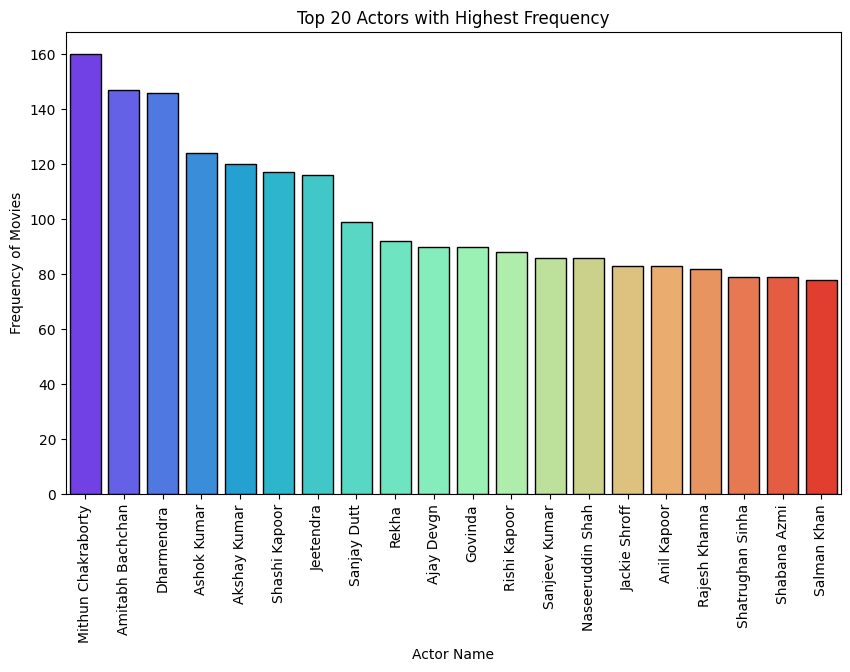

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=actors.head(20).index,y=actors.head(20).values,ec='black',palette='rainbow')
plt.xlabel('Actor Name')
plt.ylabel('Frequency of Movies')
plt.title('Top 20 Actors with Highest Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_copy = data.copy()
df_copy["Actor"] = df_copy["Actor 1"] + ", " + df_copy["Actor 2"] + ", " + df_copy["Actor 3"]
df_copy["Directors"] = df_copy["Director"].astype('category').cat.codes
df_copy["Genres"] = df_copy["Genre"].astype('category').cat.codes
df_copy["Actors"] = df_copy["Actor"].astype('category').cat.codes
df_copy.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1334,184,3326
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1527,157,1112
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2037,289,2075
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1373,323,1890
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1503,159,1971


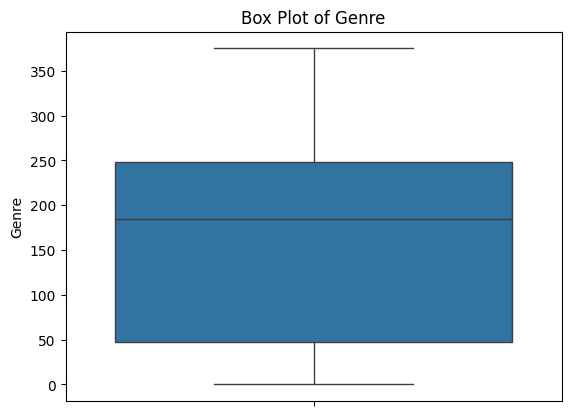

In [ ]:
sns.boxplot(data=df_copy,y = 'Genres')
plt.title('Box Plot of Genre')
plt.ylabel('Genre')
plt.show()

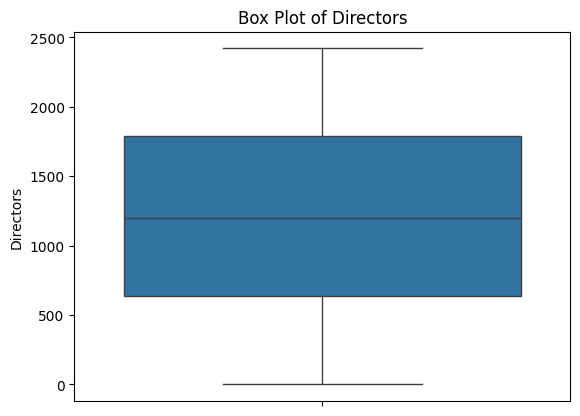

In [ ]:
sns.boxplot(data=df_copy,y = 'Directors')
plt.title('Box Plot of Directors')
plt.ylabel('Directors')
plt.show()

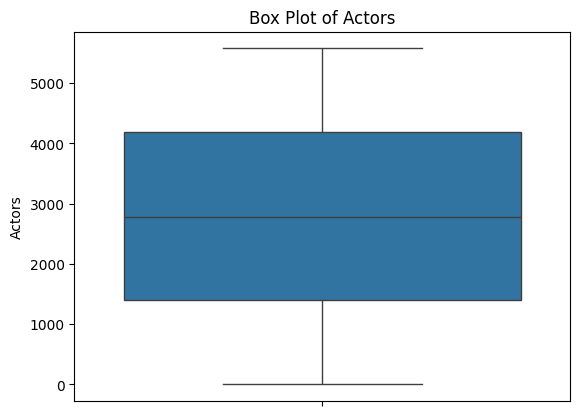

In [ ]:
sns.boxplot(data=df_copy,y = 'Actors')
plt.title('Box Plot of Actors')
plt.ylabel('Actors')
plt.show()

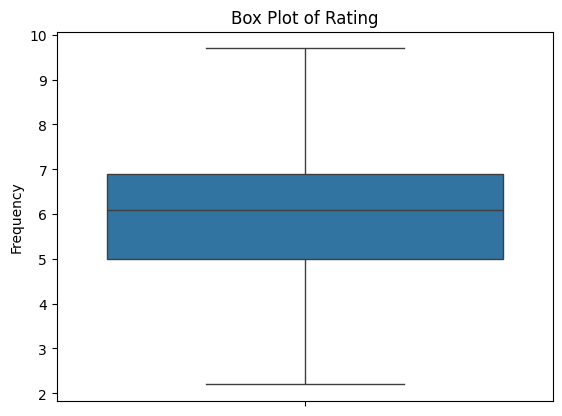

In [ ]:
sns.boxplot(data=df_copy,y = 'Rating')
plt.title('Box Plot of Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_copy['Rating'].info()

<class 'pandas.core.series.Series'>
Index: 5632 entries, 1 to 15508
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
5632 non-null   float64
dtypes: float64(1)
memory usage: 217.0 KB


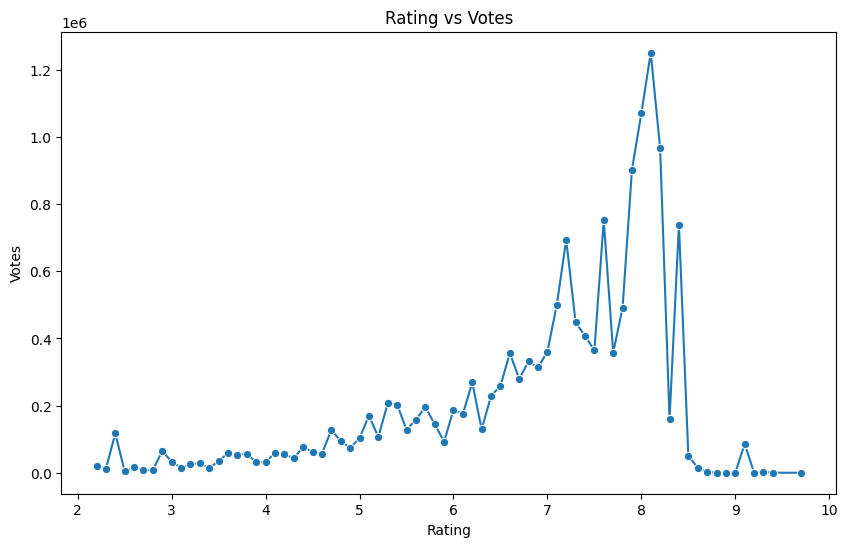

In [ ]:
rating_votes = df_copy.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='Rating',y='Votes',data=rating_votes,marker='o')
plt.title('Rating vs Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()


Fitting the dataset with appropriate model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score


In [ ]:
X = df_copy[['Year','Duration','Votes','Genres','Directors','Actors']]
Y = df_copy['Rating']

Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=88)

In [ ]:
len(X_train), len(X_test),len(Y_train),len(Y_test)

(4505, 1127, 4505, 1127)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_predict = lr.predict(X_test)
y_predict

array([5.36719296, 5.67100891, 6.46068646, ..., 5.93819251, 5.68697463,
       5.65024665])

In [ ]:
Y_test

,Rating
13101,5.9
13616,4.1
5021,7.6
4578,4.7
3506,5.7
...,...
2667,6.5
13189,6.2
959,7.3
14343,5.9


In [ ]:
X

,Year,Duration,Votes,Genres,Directors,Actors
1,2019,109,8,229,629,3858
3,2019,110,35,184,1334,3326
5,1997,147,827,157,1527,1112
6,2005,142,1086,289,2037,2075
8,2012,82,326,320,135,5535
...,...,...,...,...,...,...
15493,2015,115,408,229,1223,5331
15494,2001,153,1496,133,2052,2271
15503,1989,125,44,28,1788,1163
15505,1999,129,655,38,1025,362


In [ ]:
input_data = (2019,110,35,184,1334,3326)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(f"Predicted Rating: {prediction[0]:.2f}")


Predicted Rating: 5.58
